# NETW 1013 Clustering Project 

**Objective:** 
The objective of this project is to teach students how to apply clustering to real datasets.

You should be able to answer the following questions and provide reasonable justification for your answers: 
* Which clustering approach have you decided to use on each dataset? 
* Compare between Kmeans, Hierarchal and DBScan.
* Discuss how you tuned your clustering hyperparameters to achieve the best cluster assignment?
* What is the effect of different distance functions on the calculated clusters?
* How did you evaluate the performance of different clustering techniques on different datatsets?
* Visualize your output where applicable.
* What is the effect of scaling on the performance of clustering techniques? 

 
 



Running this project requires the following imports:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

%matplotlib inline
# Please refer to the sklearn documentation to learn more about the different parameters for each clustering technique.

In [2]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The dataset generated below is known to be best clustered into 6 clusters.
* Cluster the data set below using the three different clustering techniques discussed in the course.
* Visualize your clustering output in each step of your work.



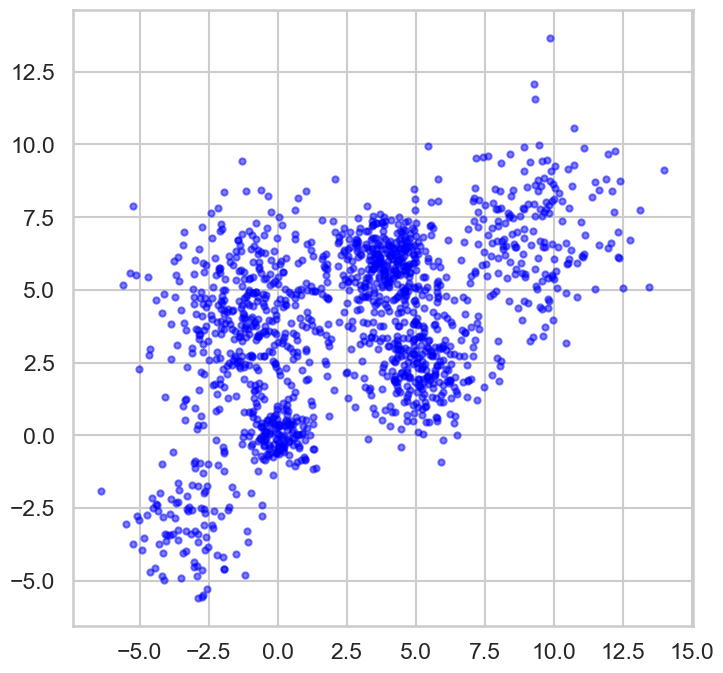

In [3]:
#Data Generation and Visualization
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

In [4]:
Multi_blob_Data

array([[-2.3542716 , -3.17974359],
       [-2.1580049 , -1.02006119],
       [-3.30439939, -3.30437804],
       ...,
       [ 9.86405669, 13.6746041 ],
       [ 5.457008  ,  9.9319843 ],
       [ 8.51133922,  7.48845914]])

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_blob = scaler.fit_transform(Multi_blob_Data)


### Kmeans 
* Use Kmeans with different values of K to cluster the above data. 
* Display the outcome of each value of K. 
* Plot distortion function versus K and choose the approriate value of K. 
* Plot the silhouette_score versus K and use it to choose the best K. 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 
* Comment on the effect of centroid initialization on cluster assignment. 
* Hint: Lookup k-means++ .

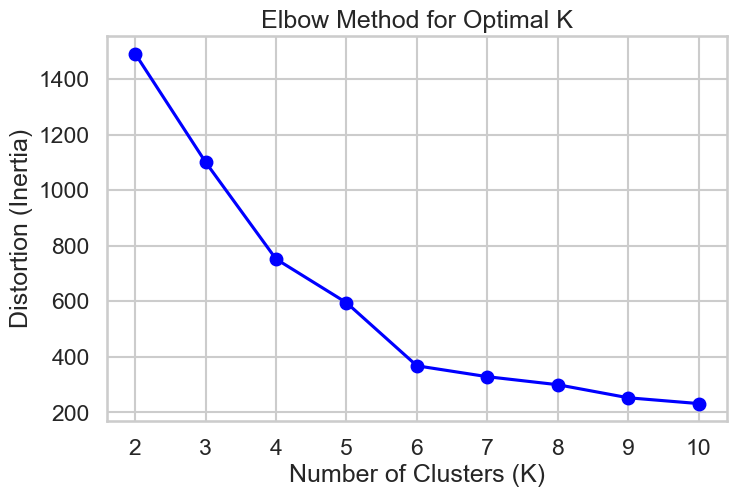

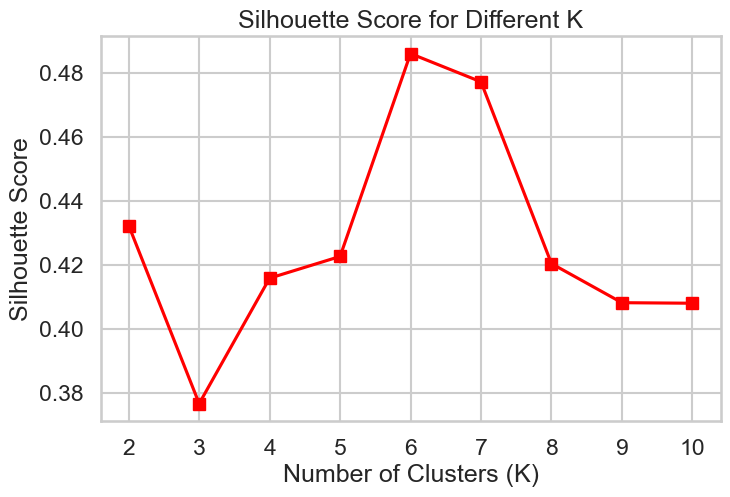

In [21]:
# Apply K-Means for different values of K
distortions = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, init='k-means++')
    km.fit(scaled_data_blob)
    distortions.append(km.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data_blob, km.labels_))
    #display_cluster(Multi_blob_Data, km, k)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, distortions, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='s', linestyle='-', color='r')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.show()


Silhouette Score for final K-Means with K=6: 0.4862522276594507


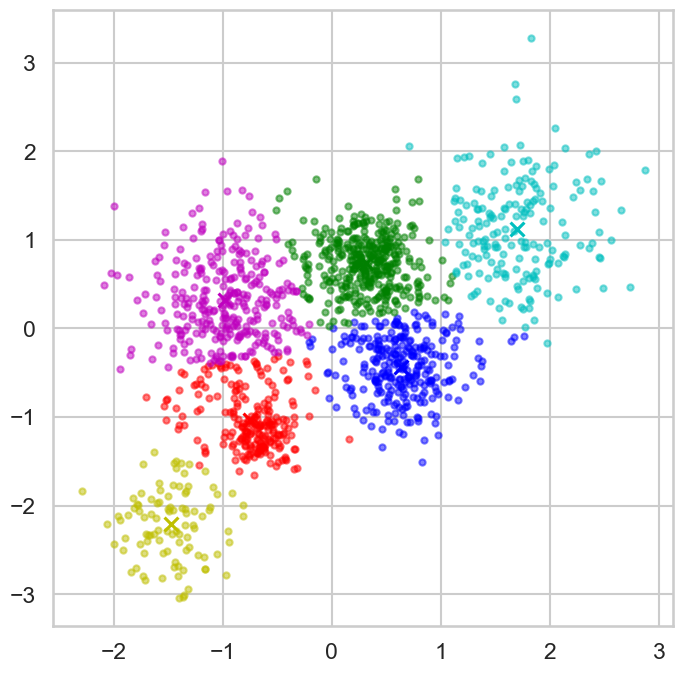

In [47]:
# Final clustering using best K
final_kmeans = KMeans(n_clusters=6, init='k-means++')
final_kmeans.fit(scaled_data_blob)
display_cluster(scaled_data_blob, final_kmeans, 6)
final_silhouette = silhouette_score(scaled_data_blob, final_kmeans.labels_)
print(f'Silhouette Score for final K-Means with K=6: {final_silhouette}')

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data.
* In the  AgglomerativeClustering change the following parameters:
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage(try different options)
    * Distance_threshold (try different options)
* Plot the dendrograph for one trial.
* For each of these trials, calculate the silhouette_score and display the resulting clusters.  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation.

In [13]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# Ward linkage only works with Euclidean distance

s = []
metric_list = ['euclidean', 'manhattan', 'cosine']
linkage_list = ['ward', 'complete', 'average', 'single']
distance_thresholds = np.linspace(5, 14, 15)

best = -1
best_metric = " " 
best_threshold = None
best_linkage = " "

for threshold in distance_thresholds:
    for metric in metric_list:  
        for linkage in linkage_list:
            if linkage == "ward" and metric != "euclidean":
                continue

            model = AgglomerativeClustering(n_clusters=None, metric=metric, linkage=linkage, 
                                            distance_threshold=threshold)
            model = model.fit(scaled_data_blob)
            labels = model.labels_

            # Check if at least 2 clusters exist before computing silhouette score
            num_clusters = len(set(labels))
            if num_clusters < 2:
                continue  # Skip this iteration if only 1 cluster is formed

            silhouette = silhouette_score(scaled_data_blob, labels)
            s.append(silhouette)

            if silhouette >= best:
                best_threshold = threshold
                best = silhouette
                best_metric = metric 
                best_linkage = linkage
                best_n_clusters = num_clusters 

print(f"Best agglomerative clustering model for this data is with a distance threshold = {best_threshold}, "
      f"linkage of {best_linkage}, and metric of {best_metric}. "
      f"Silhouette Score is {best}.", f"Number of Clusters: {best_n_clusters}")


Best agglomerative clustering model for this data is with a distance threshold = 14.0, linkage of ward, and metric of euclidean. Silhouette Score is 0.4652613157528439. Number of Clusters: 6


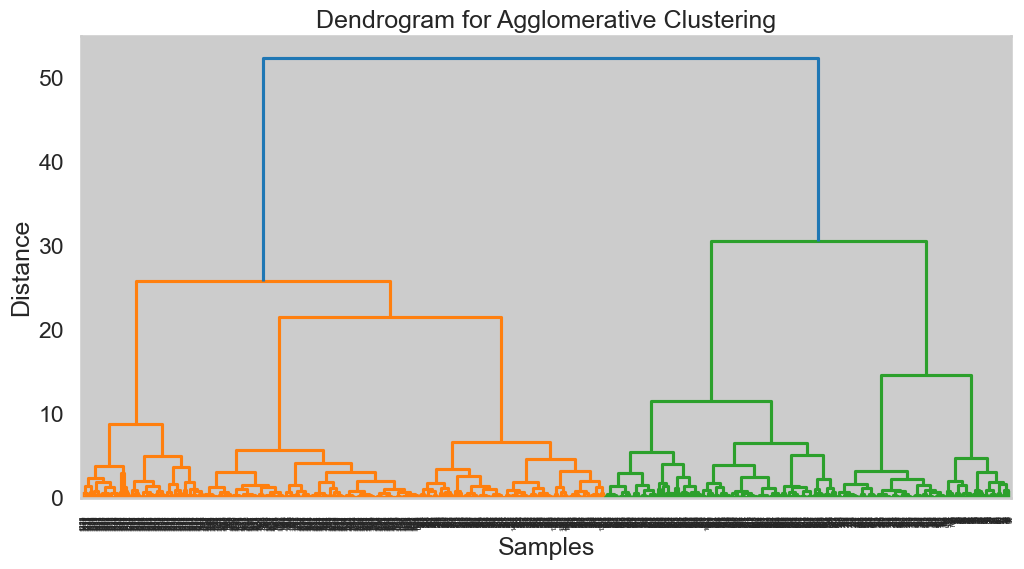

Silhouette Score: 0.4652613157528439


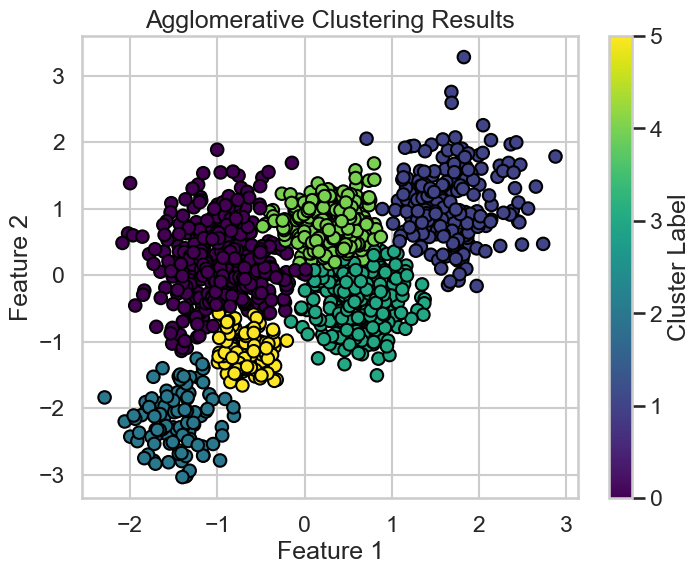

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Compute linkage matrix
linked = linkage(scaled_data_blob, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

model = AgglomerativeClustering(n_clusters=6, metric="euclidean", linkage = "ward")
cluster_labels = model.fit_predict(scaled_data_blob)
s = silhouette_score(scaled_data_blob, cluster_labels)
print(f'Silhouette Score: {s}')
# Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data_blob[:, 0], scaled_data_blob[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k')

# Plot cluster centers (if applicable, though AgglomerativeClustering does not have explicit centers)
plt.title("Agglomerative Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Label")
plt.show()


### DBScan
* Use DBScan function to  to cluster the above data. 
* In the  DBscan change the following parameters: 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
    * Another option: Lookup K-Distance graph method
* Plot the silhouette_score versus the variation in the EPS and the min_samples.
* Plot the resulting Clusters in this case. 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments. 

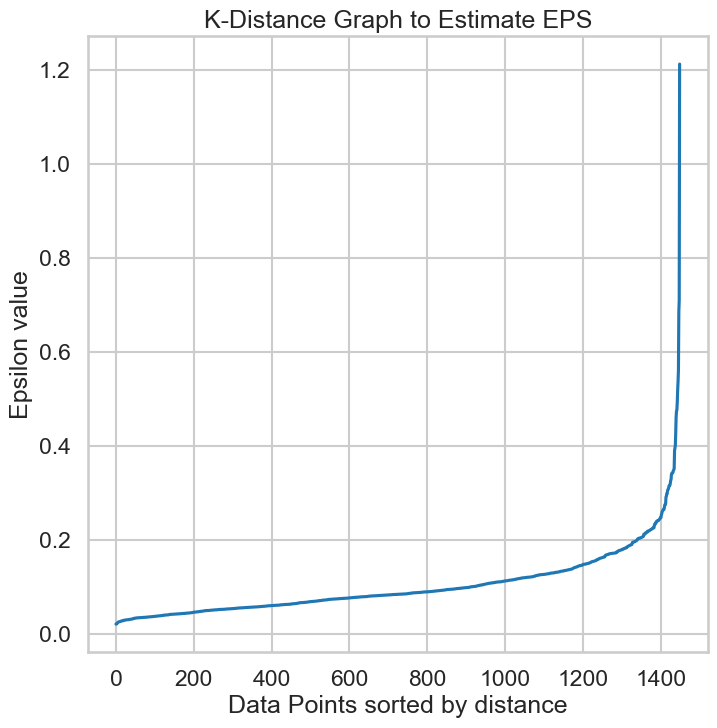

In [76]:
# Determine optimal EPS using K-Distance Graph
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_data_blob)
distances, indices = neighbors_fit.kneighbors(scaled_data_blob)

distances = np.sort(distances[:, -1])  # Sort the kth nearest neighbor distances
plt.plot(distances)
plt.xlabel("Data Points sorted by distance")
plt.ylabel("Epsilon value")
plt.title("K-Distance Graph to Estimate EPS")
plt.show()

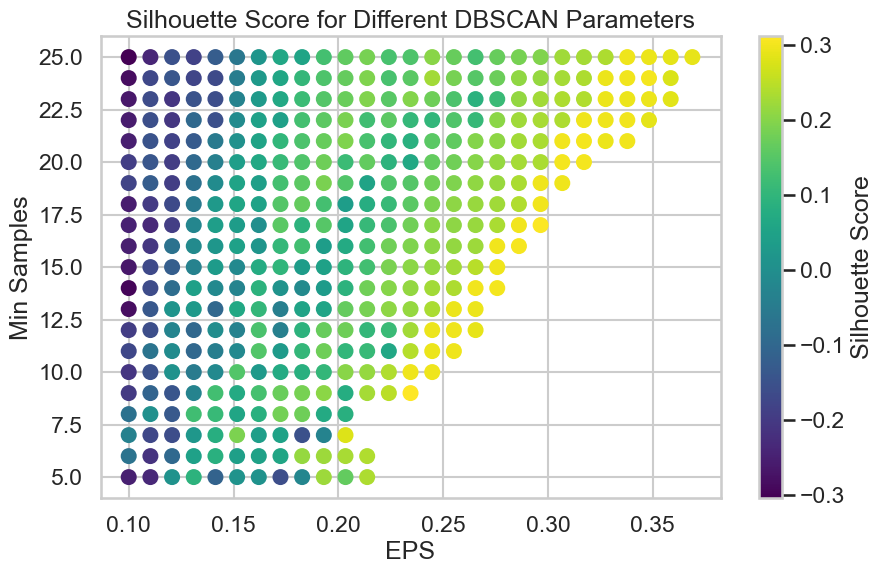

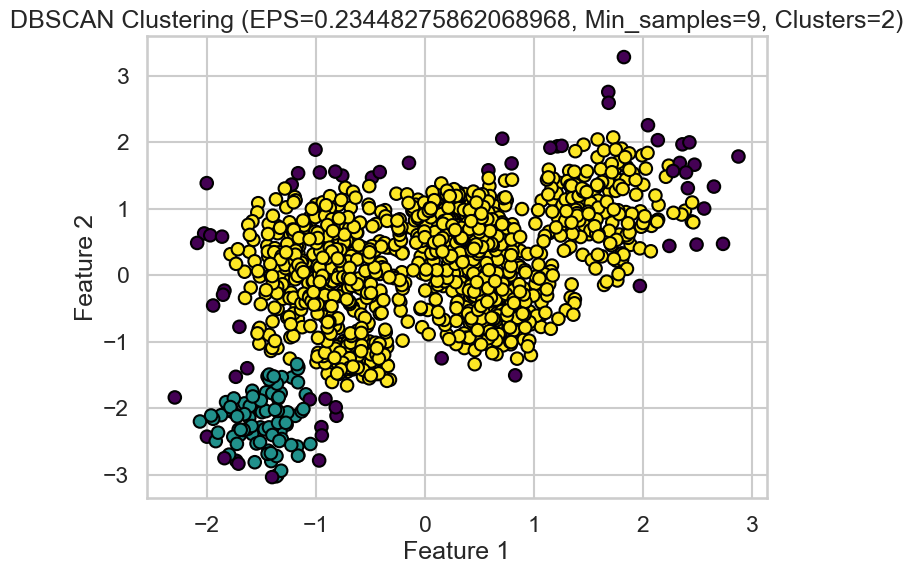

Parameters: EPS=0.23448275862068968, Min_samples=9
Silhouette Score: 0.31144279033182304
Number of Clusters: 2


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# Varying EPS and min_samples
eps_values = np.linspace(0.1, 0.4, 30)
min_samples_values = range(5, 26, 1)

best_score = -1
best_params = None
best_labels = None
best_n_clusters = 0
scores = []  # Store (eps, min_samples, silhouette_score)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_data_blob)
        
        # Ignore cases where all points are noise
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = silhouette_score(scaled_data_blob, labels)
            scores.append((eps, min_samples, score))
            
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)
                best_labels = labels
                best_n_clusters = n_clusters

# Plot silhouette score variation
if len(scores) > 0:
    scores = np.array(scores)
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(scores[:, 0], scores[:, 1], c=scores[:, 2], cmap="viridis", s=100)
    plt.colorbar(scatter, label="Silhouette Score")
    plt.xlabel("EPS")
    plt.ylabel("Min Samples")
    plt.title("Silhouette Score for Different DBSCAN Parameters")
    plt.show()
else:
    print("No valid clustering found; silhouette scores are empty.")

# Visualize best clustering result
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data_blob[:, 0], scaled_data_blob[:, 1], c=best_labels, cmap='viridis', marker='o', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"DBSCAN Clustering (EPS={best_params[0]}, Min_samples={best_params[1]}, Clusters={best_n_clusters})")
plt.show()

# Print best parameters and score
print(f"Parameters: EPS={best_params[0]}, Min_samples={best_params[1]}")
print(f"Silhouette Score: {best_score}")
print(f"Number of Clusters: {best_n_clusters}")


In [83]:
dbscan = DBSCAN(eps=0.23448275862068968, min_samples=9)
cluster_labels = dbscan.fit_predict(scaled_data_blob)
s= silhouette_score(scaled_data_blob, cluster_labels)
print(f'Silhouette Score: {s}')

Silhouette Score: 0.31144279033182304


In [ ]:
#Best approach in the first dataset is K-means (silhouette = 0.4862522276594507).

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers. 

The data represents three classes. 


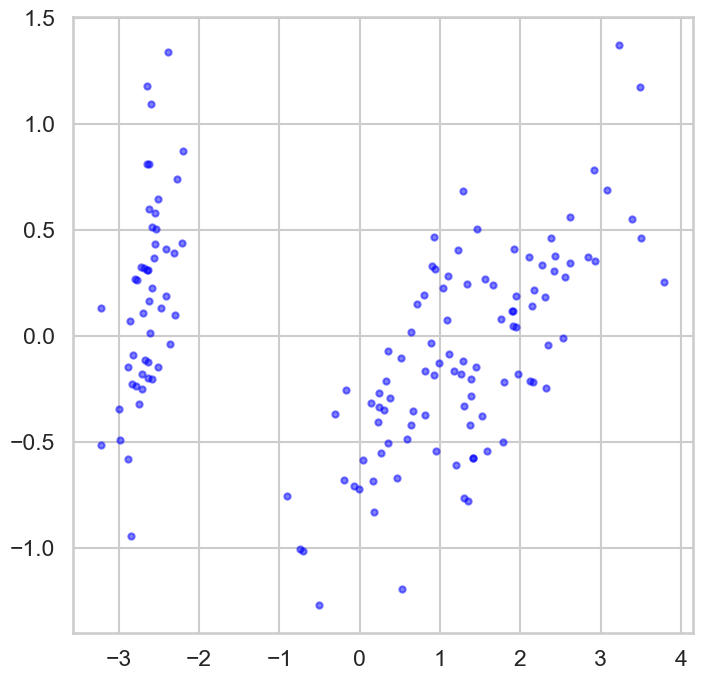

In [17]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
iris_data = iris_data.data

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_data)
display_cluster(iris_pca)

In [15]:
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

* Repeat all the above clustering approaches and steps on the above data. 
* Comment on the effect of scaling on clustering this dataset. Show the difference between clustering the data with and without   scaling.
* Compare between the different clustering approaches. 
* Is your clustering outcome consistent with the labels?

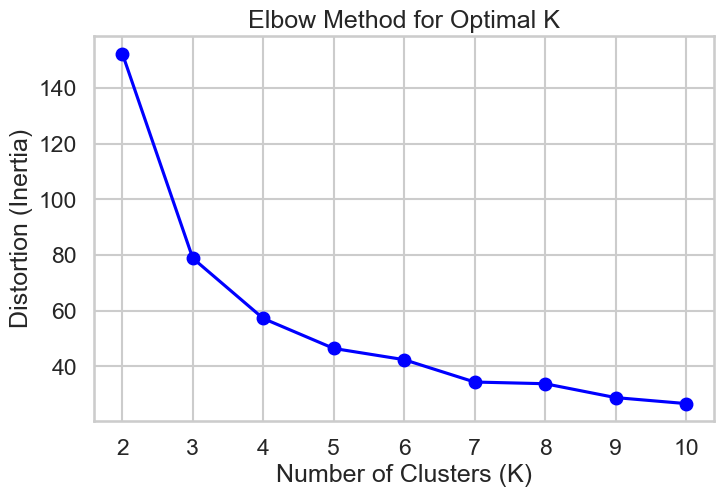

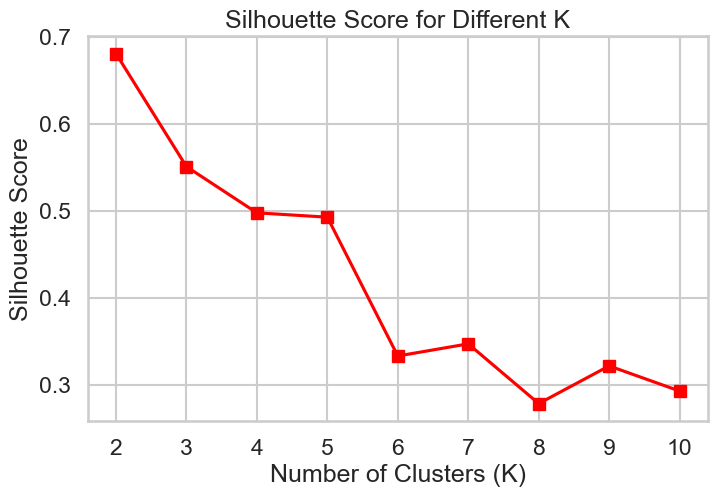

In [85]:
#Without Scaling

#1.K-means clustering
# Apply K-Means for different values of K
distortions = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, init='k-means++')
    km.fit(iris_data)
    distortions.append(km.inertia_)
    silhouette_scores.append(silhouette_score(iris_data, km.labels_))

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, distortions, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='s', linestyle='-', color='r')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.show()

Silhouette Score for final K-Means with K=3: 0.5528190123564095


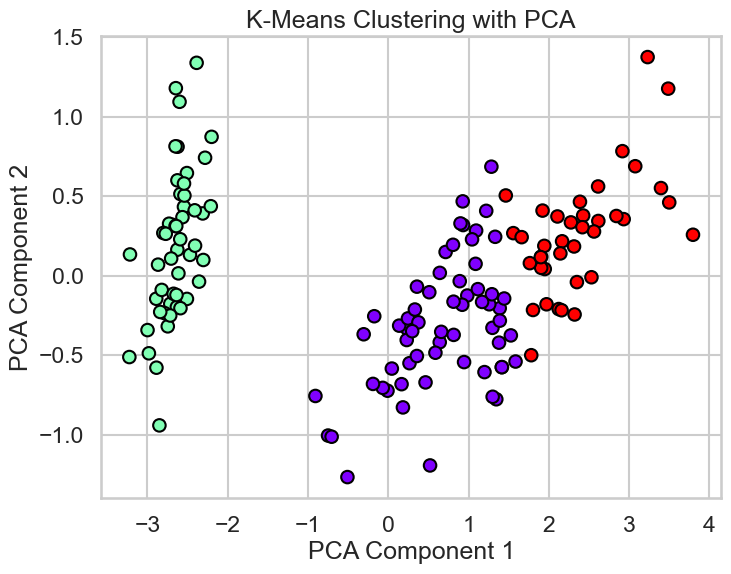

In [17]:
kmeans = KMeans(n_clusters=3, init='k-means++')
labels = kmeans.fit_predict(iris_data)  # Get cluster labels
final_silhouette = silhouette_score(iris_data, kmeans.labels_)
print(f'Silhouette Score for final K-Means with K=3: {final_silhouette}')
# Apply PCA for visualization
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_data)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=labels, cmap='rainbow', edgecolors='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# Ward linkage only works with Euclidean distance

s = []
metric_list = ['euclidean', 'manhattan', 'cosine']
linkage_list = ['ward', 'complete', 'average', 'single']
distance_thresholds = np.linspace(5, 14, 15)

best = -1
best_metric = " " 
best_threshold = None
best_linkage = " "

for threshold in distance_thresholds:
    for metric in metric_list:  
        for linkage in linkage_list:
            if linkage == "ward" and metric != "euclidean":
                continue

            model = AgglomerativeClustering(n_clusters=None, metric=metric, linkage=linkage, 
                                            distance_threshold=threshold)
            model = model.fit(iris_data)
            labels = model.labels_

            # Check if at least 2 clusters exist before computing silhouette score
            num_clusters = len(set(labels))
            if num_clusters < 2:
                continue  # Skip this iteration if only 1 cluster is formed

            silhouette = silhouette_score(iris_data, labels)
            s.append(silhouette)

            if silhouette >= best:
                best_threshold = threshold
                best = silhouette
                best_metric = metric 
                best_linkage = linkage
                best_n_clusters = num_clusters 

print(f"Best agglomerative clustering model for this data is with a distance threshold = {best_threshold}, "
      f"linkage of {best_linkage}, and metric of {best_metric}. "
      f"Silhouette Score is {best}.", f"Number of Clusters: {best_n_clusters}")


Best agglomerative clustering model for this data is with a distance threshold = 14.0, linkage of ward, and metric of euclidean. Silhouette Score is 0.6867350732769777. Number of Clusters: 2


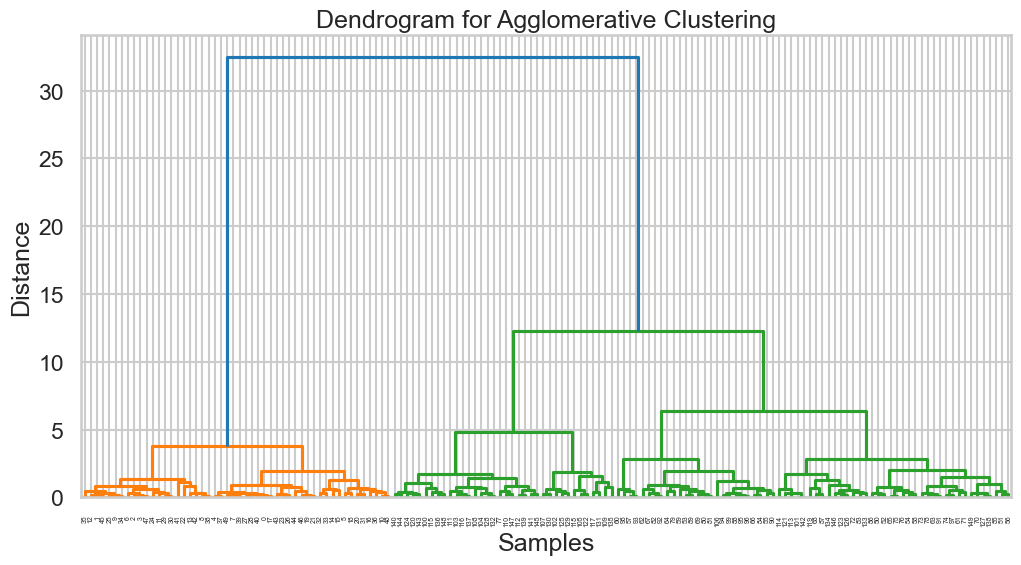

Silhouette Score: 0.6867350732769777


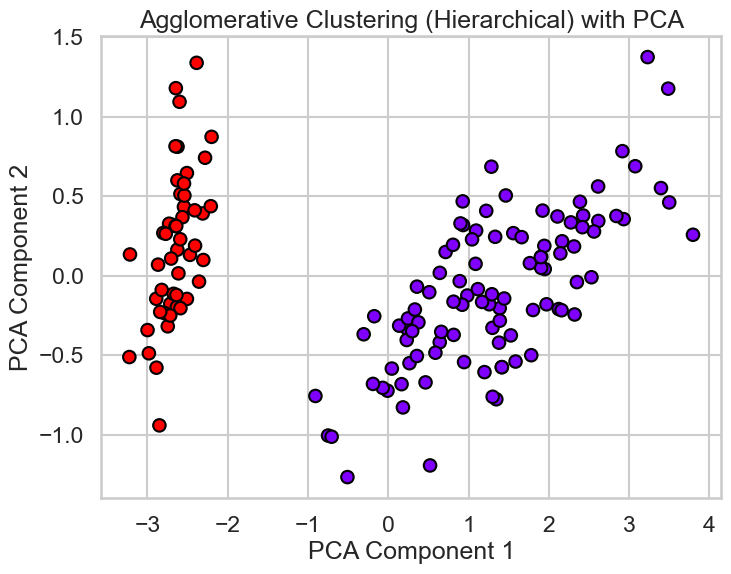

In [88]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute linkage matrix
linked = linkage(iris_data, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_data)
model = AgglomerativeClustering(n_clusters=None, metric="euclidean", linkage = "ward",distance_threshold=14)
cluster_labels = model.fit_predict(iris_data)
sil = silhouette_score(iris_data, cluster_labels)
print(f'Silhouette Score: {sil}')
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=cluster_labels, cmap='rainbow', edgecolors='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Agglomerative Clustering (Hierarchical) with PCA")
plt.show()



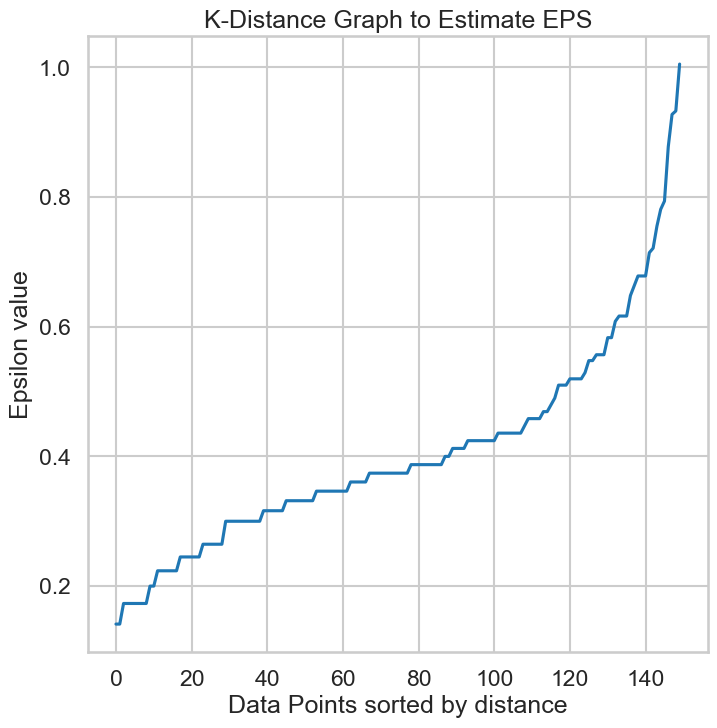

In [91]:
# Determine optimal EPS using K-Distance Graph
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(iris_data)
distances, indices = neighbors_fit.kneighbors(iris_data)

distances = np.sort(distances[:, -1])  # Sort the kth nearest neighbor distances
plt.plot(distances)
plt.xlabel("Data Points sorted by distance")
plt.ylabel("Epsilon value")
plt.title("K-Distance Graph to Estimate EPS")
plt.show()

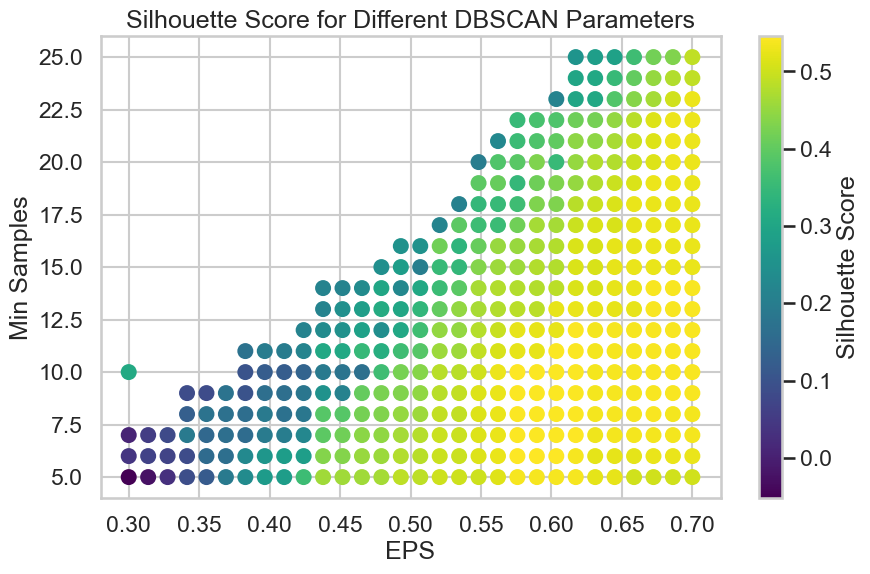

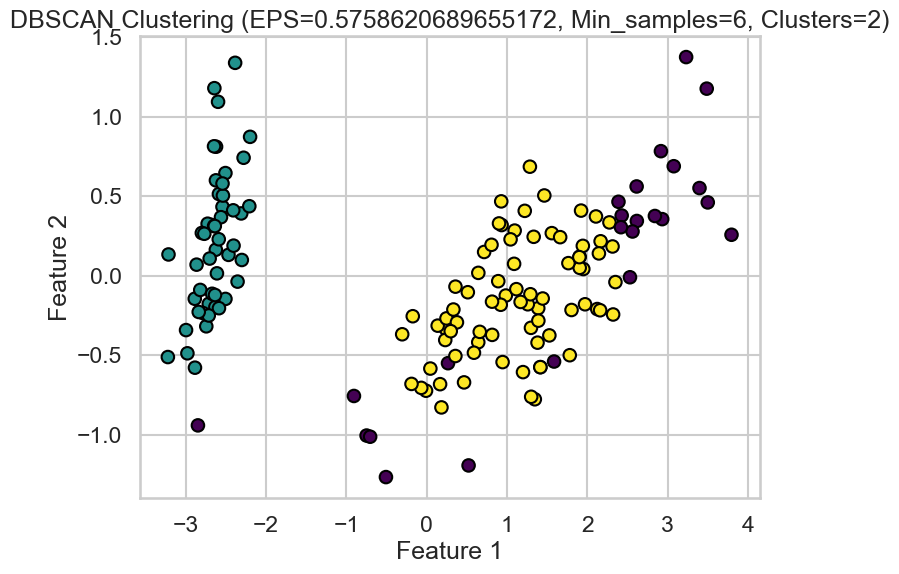

Parameters: EPS=0.5758620689655172, Min_samples=6
Silhouette Score: 0.5455653321123303
Number of Clusters: 2


In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# Varying EPS and min_samples
eps_values = np.linspace(0.3, 0.7, 30)
min_samples_values = range(5, 26, 1)

best_score = -1
best_params = None
best_labels = None
best_n_clusters = 0
scores = []  # Store (eps, min_samples, silhouette_score)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(iris_data)
        
        # Ignore cases where all points are noise
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = silhouette_score(iris_data, labels)
            scores.append((eps, min_samples, score))
            
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)
                best_labels = labels
                best_n_clusters = n_clusters

# Plot silhouette score variation
if len(scores) > 0:
    scores = np.array(scores)
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(scores[:, 0], scores[:, 1], c=scores[:, 2], cmap="viridis", s=100)
    plt.colorbar(scatter, label="Silhouette Score")
    plt.xlabel("EPS")
    plt.ylabel("Min Samples")
    plt.title("Silhouette Score for Different DBSCAN Parameters")
    plt.show()
else:
    print("No valid clustering found; silhouette scores are empty.")

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_data)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"DBSCAN Clustering (EPS={best_params[0]}, Min_samples={best_params[1]}, Clusters={best_n_clusters})")
plt.show()

# Print best parameters and score
print(f"Parameters: EPS={best_params[0]}, Min_samples={best_params[1]}")
print(f"Silhouette Score: {best_score}")
print(f"Number of Clusters: {best_n_clusters}")


In [99]:
dbscan = DBSCAN(eps=0.5758620689655172, min_samples=6)
cluster_labels = dbscan.fit_predict(iris_data)
s = silhouette_score(iris_data, cluster_labels)
print(f'Silhouette Score: {s}')

Silhouette Score: 0.5455653321123303


In [29]:
#With Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris_data)

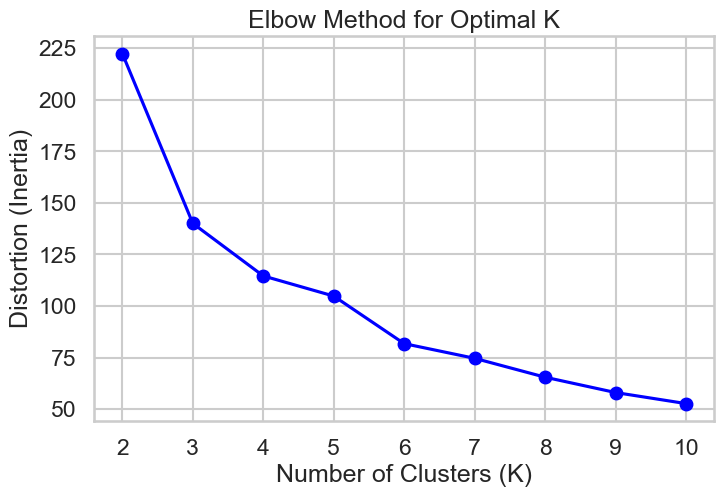

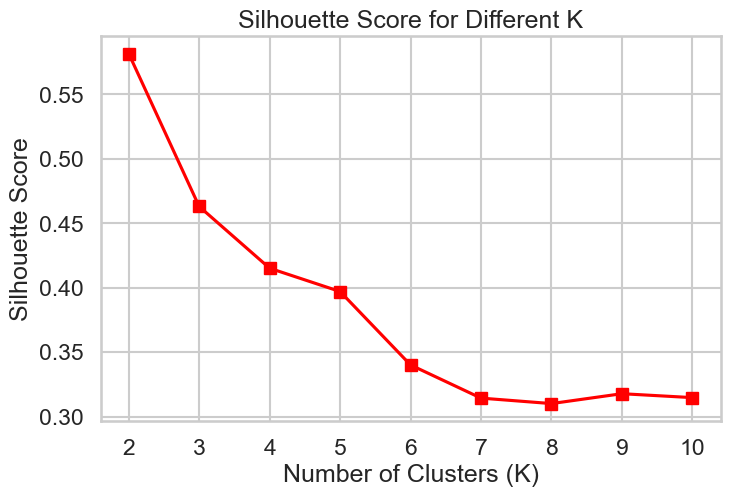

In [21]:
#1.K-means clustering
# Apply K-Means for different values of K
distortions = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, init='k-means++')
    km.fit(scaled_data)
    distortions.append(km.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, km.labels_))
    #display_cluster(scaled_data, km, k)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, distortions, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='s', linestyle='-', color='r')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.show()


Silhouette Score for final K-Means with K=3: 0.4565352255831263


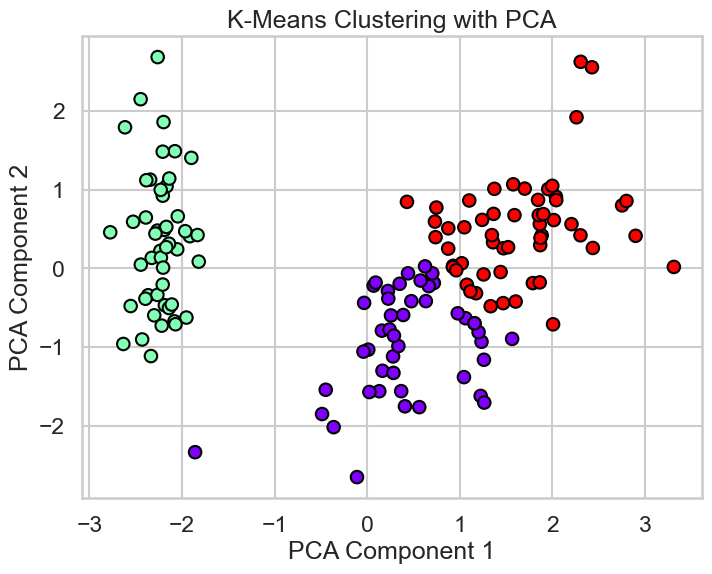

In [23]:
kmeans = KMeans(n_clusters=3, init='k-means++')
labels = kmeans.fit_predict(scaled_data)  # Get cluster labels
final_silhouette = silhouette_score(scaled_data, kmeans.labels_)
print(f'Silhouette Score for final K-Means with K=3: {final_silhouette}')

# Apply PCA for visualization
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=labels, cmap='rainbow', edgecolors='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()

In [33]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# Ward linkage only works with Euclidean distance

s = []
metric_list = ['euclidean', 'manhattan', 'cosine']
linkage_list = ['ward', 'complete', 'average', 'single']
distance_thresholds = np.linspace(5, 14, 15)

best = -1
best_metric = " " 
best_threshold = None
best_linkage = " "

for threshold in distance_thresholds:
    for metric in metric_list:  
        for linkage in linkage_list:
            if linkage == "ward" and metric != "euclidean":
                continue

            model = AgglomerativeClustering(n_clusters=None, metric=metric, linkage=linkage, 
                                            distance_threshold=threshold)
            model = model.fit(scaled_data)
            labels = model.labels_

            # Check if at least 2 clusters exist before computing silhouette score
            num_clusters = len(set(labels))
            if num_clusters < 2:
                continue  # Skip this iteration if only 1 cluster is formed

            silhouette = silhouette_score(scaled_data, labels)
            s.append(silhouette)

            if silhouette >= best:
                best_threshold = threshold
                best = silhouette
                best_metric = metric 
                best_linkage = linkage
                best_n_clusters = num_clusters 

print(f"Best agglomerative clustering model for this data is with a distance threshold = {best_threshold}, "
      f"linkage of {best_linkage}, and metric of {best_metric}. "
      f"Silhouette Score is {best}.", f"Number of Clusters: {best_n_clusters}")


Best agglomerative clustering model for this data is with a distance threshold = 6.285714285714286, linkage of average, and metric of manhattan. Silhouette Score is 0.5817500491982808. Number of Clusters: 2


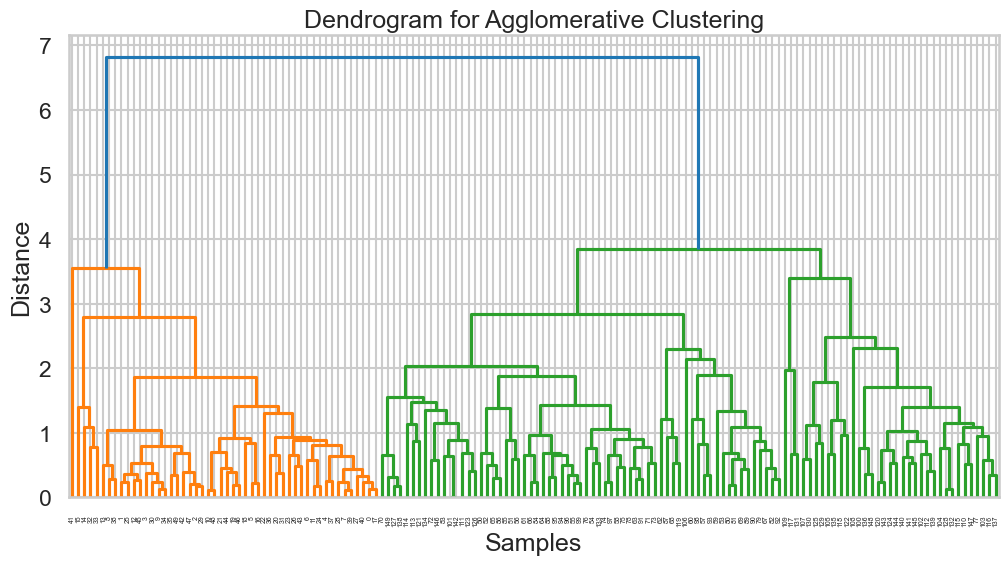

Silhouette Score: 0.5817500491982808


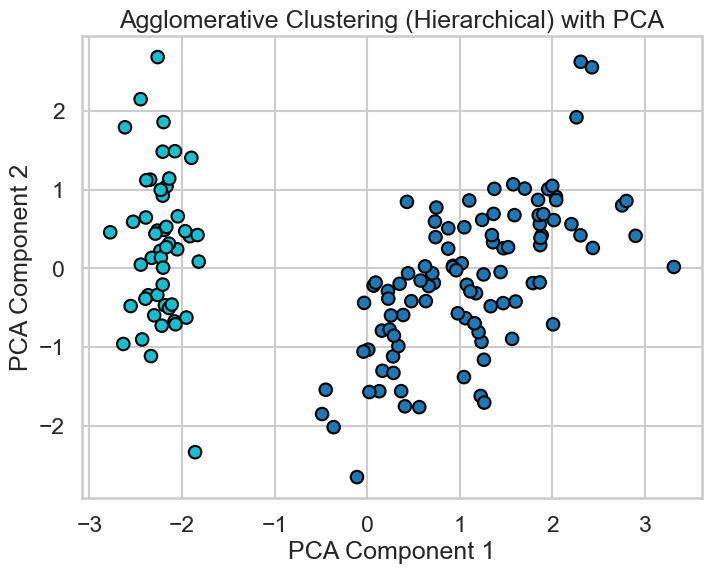

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute linkage matrix
linked = linkage(scaled_data, method='average', metric='cityblock')  # Manhattan distance

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(scaled_data)
model = AgglomerativeClustering(n_clusters=None, metric="manhattan", linkage = "average",distance_threshold=best_threshold)
cluster_labels = model.fit_predict(scaled_data)
silhouette= silhouette_score(scaled_data, cluster_labels)
print(f'Silhouette Score: {silhouette}')
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=cluster_labels, cmap='tab10', edgecolors='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Agglomerative Clustering (Hierarchical) with PCA")
plt.show()



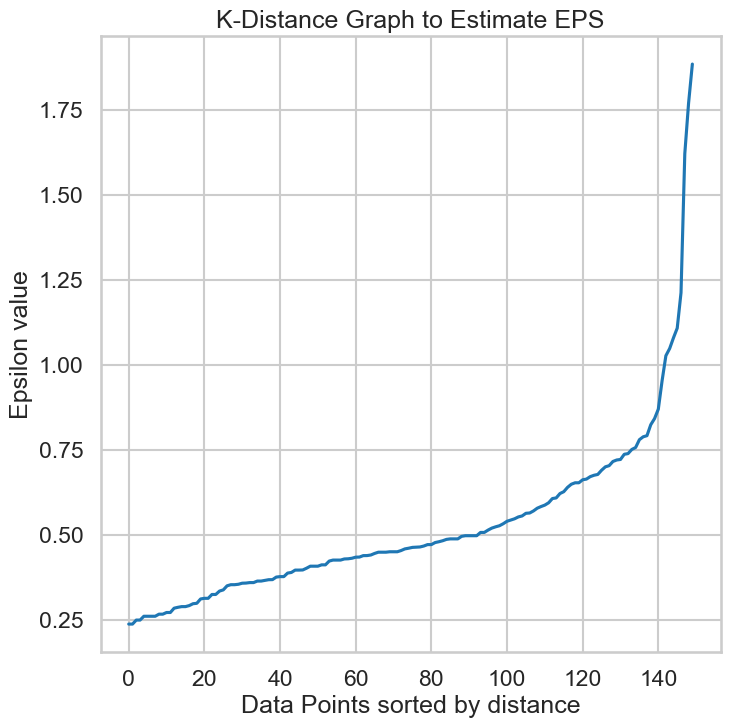

In [107]:
# Determine optimal EPS using K-Distance Graph
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

distances = np.sort(distances[:, -1])  # Sort the kth nearest neighbor distances
plt.plot(distances)
plt.xlabel("Data Points sorted by distance")
plt.ylabel("Epsilon value")
plt.title("K-Distance Graph to Estimate EPS")
plt.show()

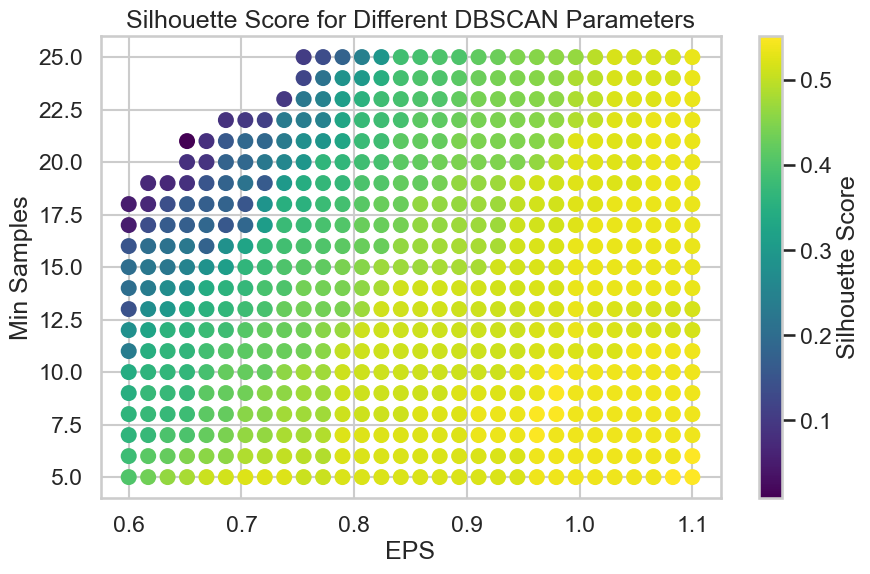

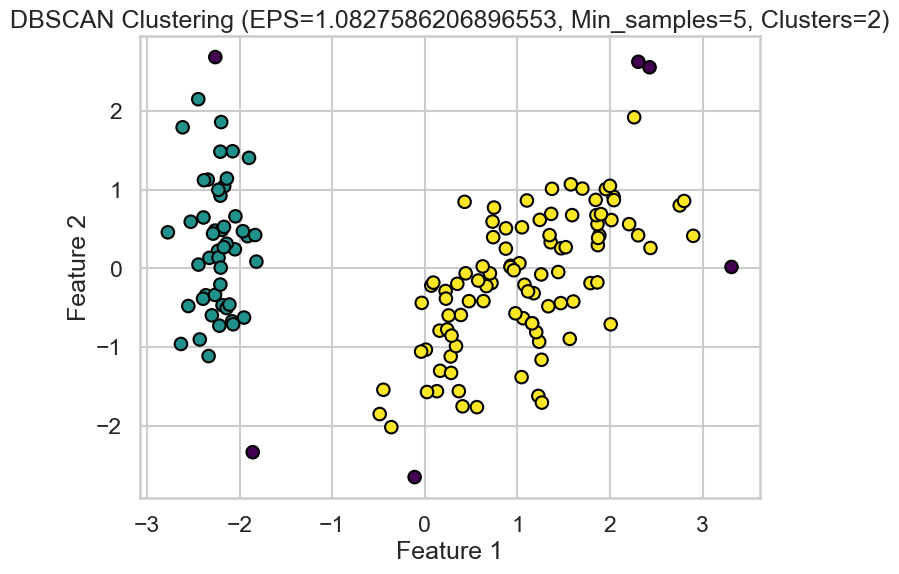

Parameters: EPS=1.0827586206896553, Min_samples=5
Silhouette Score: 0.5517715602892105
Number of Clusters: 2


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# Varying EPS and min_samples
eps_values = np.linspace(0.6, 1.1, 30)
min_samples_values = range(5, 26, 1)

best_score = -1
best_params = None
best_labels = None
best_n_clusters = 0
scores = []  # Store (eps, min_samples, silhouette_score)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_data)
        
        # Ignore cases where all points are noise
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = silhouette_score(scaled_data, labels)
            scores.append((eps, min_samples, score))
            
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)
                best_labels = labels
                best_n_clusters = n_clusters

# Plot silhouette score variation
if len(scores) > 0:
    scores = np.array(scores)
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(scores[:, 0], scores[:, 1], c=scores[:, 2], cmap="viridis", s=100)
    plt.colorbar(scatter, label="Silhouette Score")
    plt.xlabel("EPS")
    plt.ylabel("Min Samples")
    plt.title("Silhouette Score for Different DBSCAN Parameters")
    plt.show()
else:
    print("No valid clustering found; silhouette scores are empty.")

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"DBSCAN Clustering (EPS={best_params[0]}, Min_samples={best_params[1]}, Clusters={best_n_clusters})")
plt.show()

# Print best parameters and score
print(f"Parameters: EPS={best_params[0]}, Min_samples={best_params[1]}")
print(f"Silhouette Score: {best_score}")
print(f"Number of Clusters: {best_n_clusters}")


In [113]:
dbscan = DBSCAN(eps=1.07979797979798, min_samples=5)
cluster_labels = dbscan.fit_predict(scaled_data)
s = silhouette_score(scaled_data, cluster_labels)
print(f'Silhouette Score: {s}')

Silhouette Score: 0.5517715602892105


## Customer dataset
Repeat all the above on the customer data set 

In [63]:
import pandas as pd
df = pd.read_csv("Customer_data.csv")

In [65]:
df.head()

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

In [67]:
df.drop(columns=['ID'],inplace=True)
df.head()


Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0    0               0   67          2  124670           1                2
1    1               1   22          1  150773           1                2
2    0               0   49          1   89210           0                0
3    0               0   45          1  171565           1                1
4    0               0   53          1  149031           1                1

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform data
scaled_df = scaler.fit_transform(df)

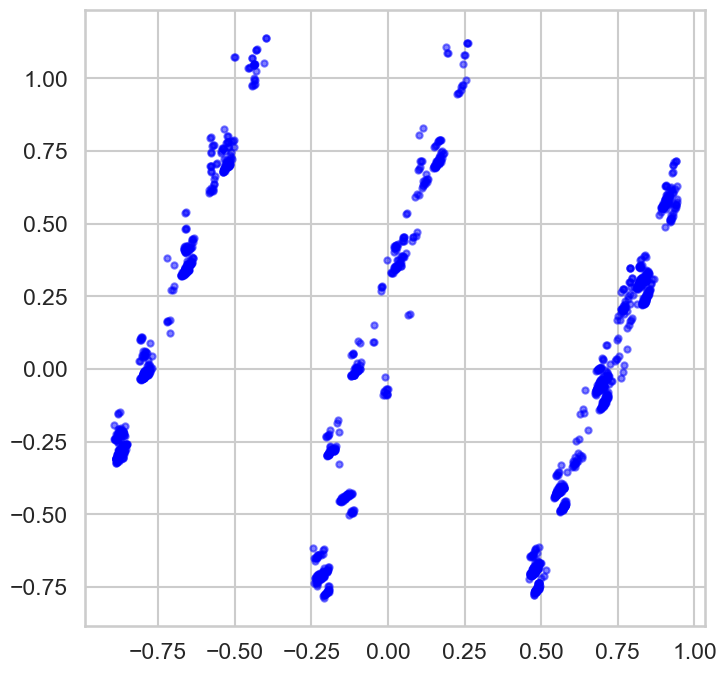

In [71]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_df)
display_cluster(df_pca)

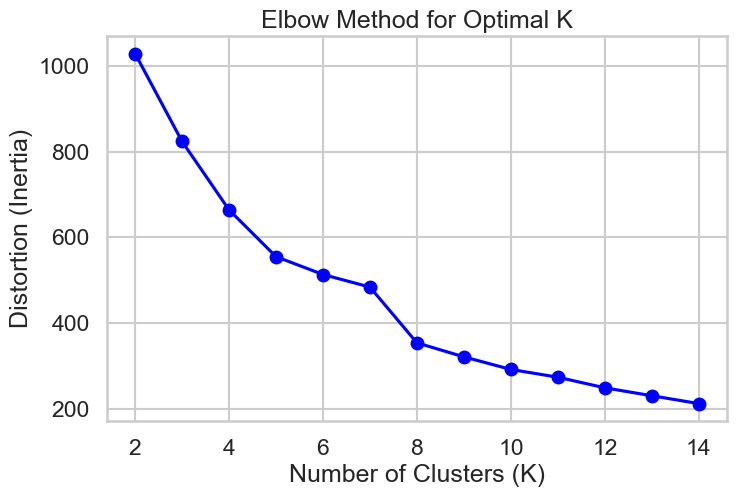

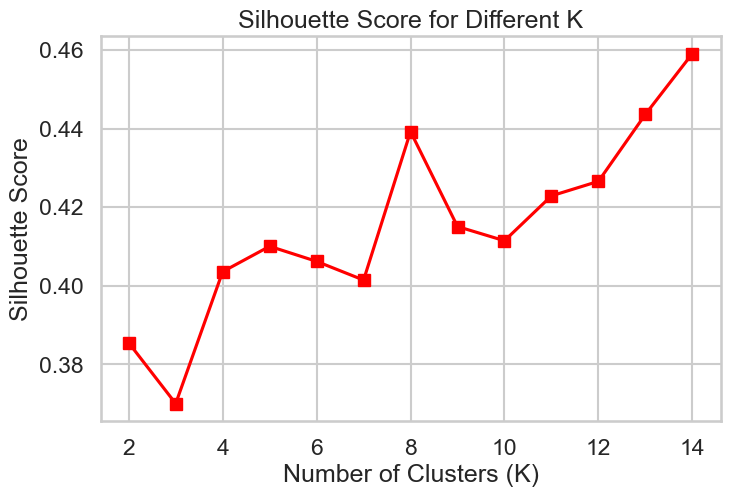

In [93]:
#MinMax
distortions = []
silhouette_scores = []
k_range = range(2, 15)

for k in k_range:
    km = KMeans(n_clusters=k, init='k-means++',random_state=42)
    km.fit(scaled_df)
    distortions.append(km.inertia_)
    silhouette_scores.append(silhouette_score(scaled_df, km.labels_))
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, distortions, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='s', linestyle='-', color='r')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.show()

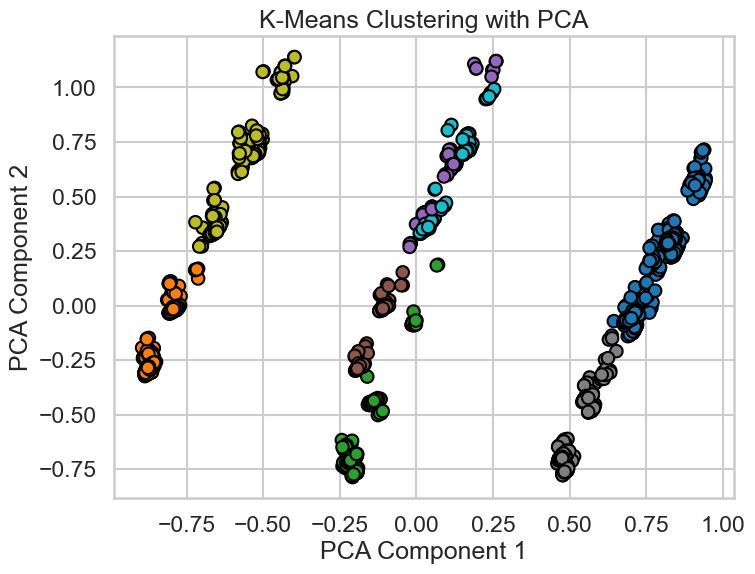

Silhouette Score: 0.4392166771090607


In [91]:
kmeans = KMeans(n_clusters=8, init='k-means++',random_state=42)
labels = kmeans.fit_predict(scaled_df) 

# Apply PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_df)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='tab10', edgecolors='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()
silhouette = silhouette_score(scaled_df, kmeans.labels_)
print(f'Silhouette Score: {silhouette}')

In [99]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# Ward linkage only works with Euclidean distance

s = []
metric_list = ['euclidean', 'manhattan', 'cosine']
linkage_list = ['ward', 'complete', 'average', 'single']
distance_thresholds = np.linspace(7, 14, 15)

best = -1
best_metric = " " 
best_threshold = None
best_linkage = " "

for threshold in distance_thresholds:
    for metric in metric_list:  
        for linkage in linkage_list:
            if linkage == "ward" and metric != "euclidean":
                continue

            model = AgglomerativeClustering(n_clusters=None, metric=metric, linkage=linkage, 
                                            distance_threshold=threshold)
            model = model.fit(scaled_df)
            labels = model.labels_

            # Check if at least 2 clusters exist before computing silhouette score
            num_clusters = len(set(labels))
            if num_clusters < 2:
                continue  # Skip this iteration if only 1 cluster is formed

            silhouette = silhouette_score(scaled_df, labels)
            s.append(silhouette)

            if silhouette >= best:
                best_threshold = threshold
                best = silhouette
                best_metric = metric 
                best_linkage = linkage
                best_n_clusters = num_clusters 

print(f"Best agglomerative clustering model for this data is with a distance threshold = {best_threshold}, "
      f"linkage of {best_linkage}, and metric of {best_metric}. "
      f"Silhouette Score is {best}.", f"Number of Clusters: {best_n_clusters}")


Best agglomerative clustering model for this data is with a distance threshold = 9.0, linkage of ward, and metric of euclidean. Silhouette Score is 0.40193833262136136. Number of Clusters: 8


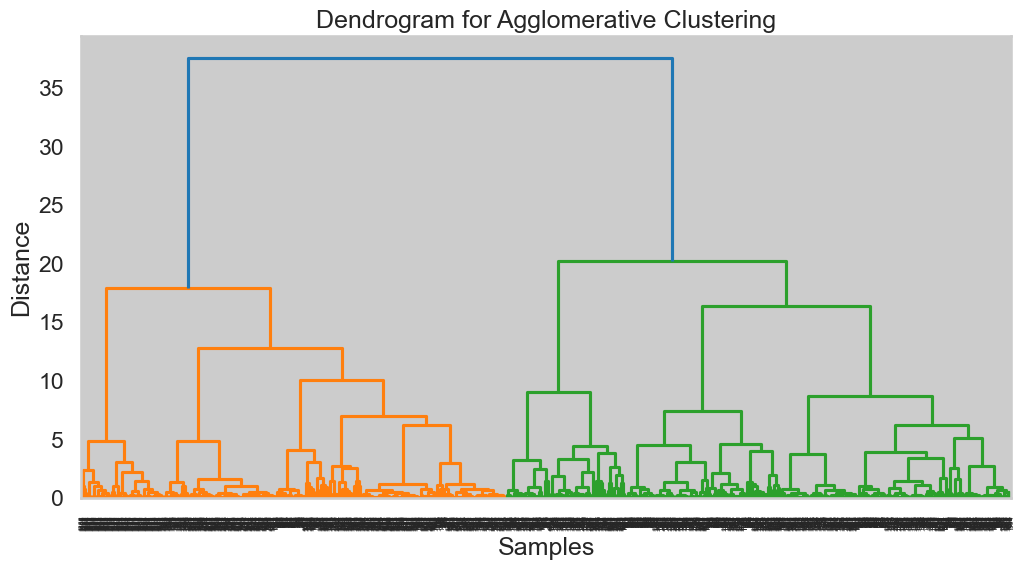

Silhouette Score: 0.40193833262136136


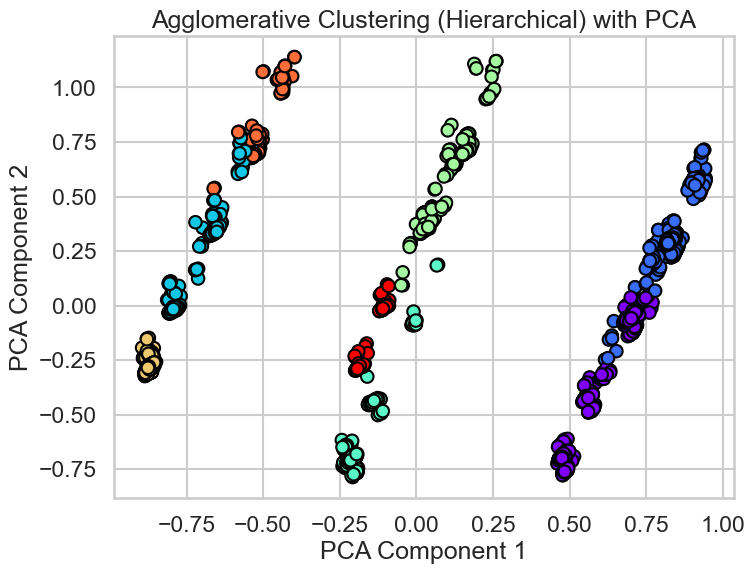

In [101]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute linkage matrix
linked = linkage(scaled_df, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_df)
model = AgglomerativeClustering(n_clusters=None, metric="euclidean", linkage = "ward",distance_threshold=best_threshold)
cluster_labels = model.fit_predict(scaled_df)
silhouette= silhouette_score(scaled_df, cluster_labels)
print(f'Silhouette Score: {silhouette}')
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='rainbow', edgecolors='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Agglomerative Clustering (Hierarchical) with PCA")
plt.show()



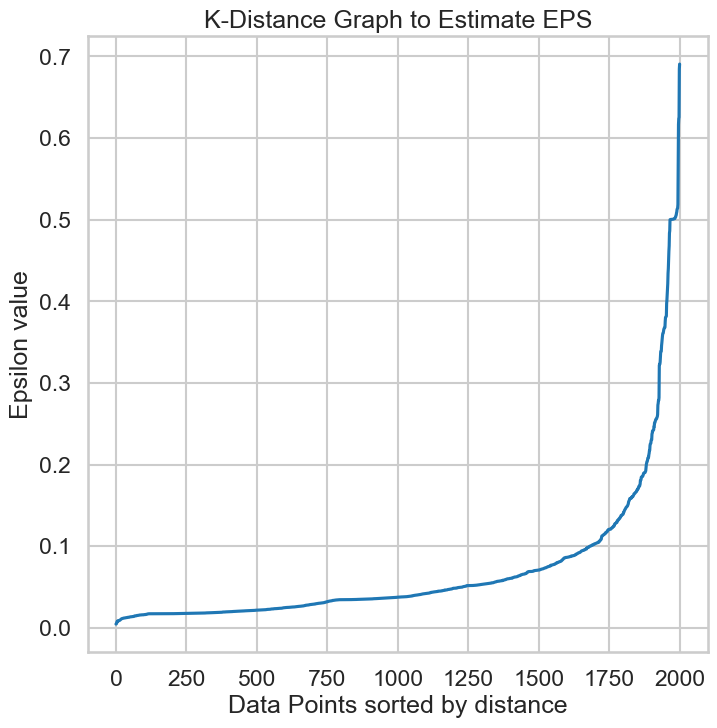

In [107]:
# Determine optimal EPS using K-Distance Graph
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_df)
distances, indices = neighbors_fit.kneighbors(scaled_df)

distances = np.sort(distances[:, -1])  # Sort the kth nearest neighbor distances
plt.plot(distances)
plt.xlabel("Data Points sorted by distance")
plt.ylabel("Epsilon value")
plt.title("K-Distance Graph to Estimate EPS")
plt.show()

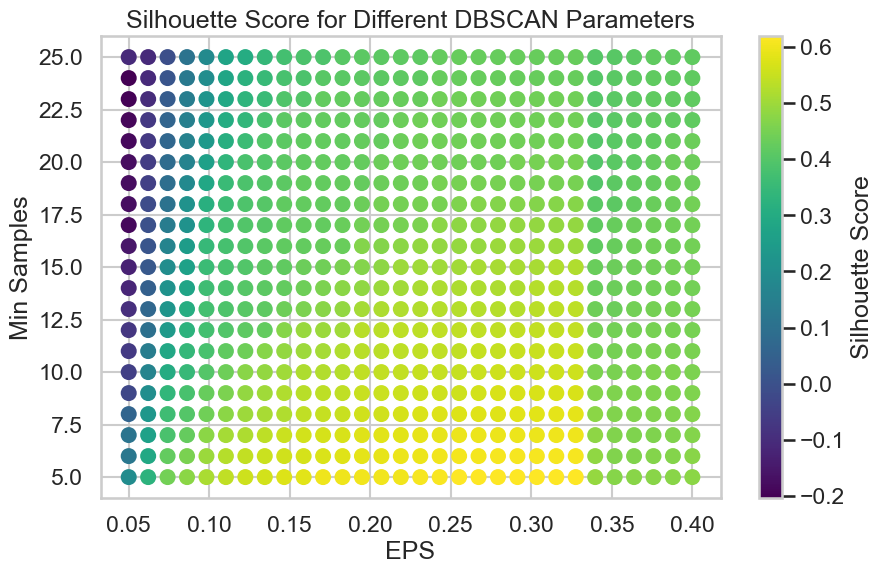

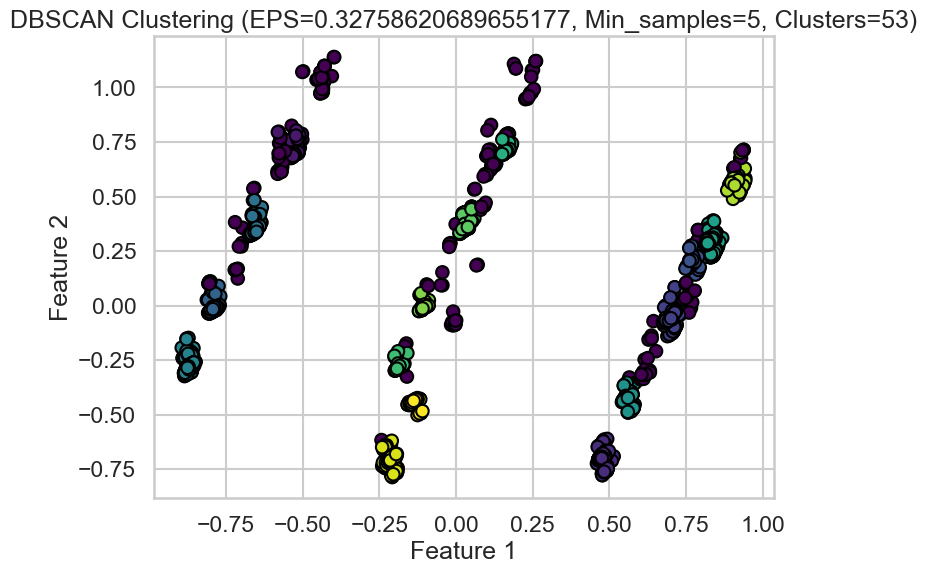

Parameters: EPS=0.32758620689655177, Min_samples=5
Silhouette Score: 0.6192050218196824
Number of Clusters: 53


In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler


# Varying EPS and min_samples
eps_values = np.linspace(0.05, 0.4, 30)
min_samples_values = range(5, 26, 1)

best_score = -1
best_params = None
best_labels = None
best_n_clusters = 0
scores = []  # Store (eps, min_samples, silhouette_score)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_df)
        
        # Ignore cases where all points are noise
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = silhouette_score(scaled_df, labels)
            scores.append((eps, min_samples, score))
            
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)
                best_labels = labels
                best_n_clusters = n_clusters

# Plot silhouette score variation
if len(scores) > 0:
    scores = np.array(scores)
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(scores[:, 0], scores[:, 1], c=scores[:, 2], cmap="viridis", s=100)
    plt.colorbar(scatter, label="Silhouette Score")
    plt.xlabel("EPS")
    plt.ylabel("Min Samples")
    plt.title("Silhouette Score for Different DBSCAN Parameters")
    plt.show()
else:
    print("No valid clustering found; silhouette scores are empty.")

pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_df)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"DBSCAN Clustering (EPS={best_params[0]}, Min_samples={best_params[1]}, Clusters={best_n_clusters})")
plt.show()

# Print best parameters and score
print(f"Parameters: EPS={best_params[0]}, Min_samples={best_params[1]}")
print(f"Silhouette Score: {best_score}")
print(f"Number of Clusters: {best_n_clusters}")


In [117]:
dbscan = DBSCAN(eps=0.32758620689655177, min_samples=5)
cluster_labels = dbscan.fit_predict(scaled_df)
s = silhouette_score(scaled_df, cluster_labels)
print(f'Silhouette Score: {s}')

Silhouette Score: 0.6192050218196824


Best DBSCAN Model: {'eps': 0.552542372881356, 'min_samples': 5, 'num_clusters': 4}
Best Davies-Bouldin Index: 0.9257


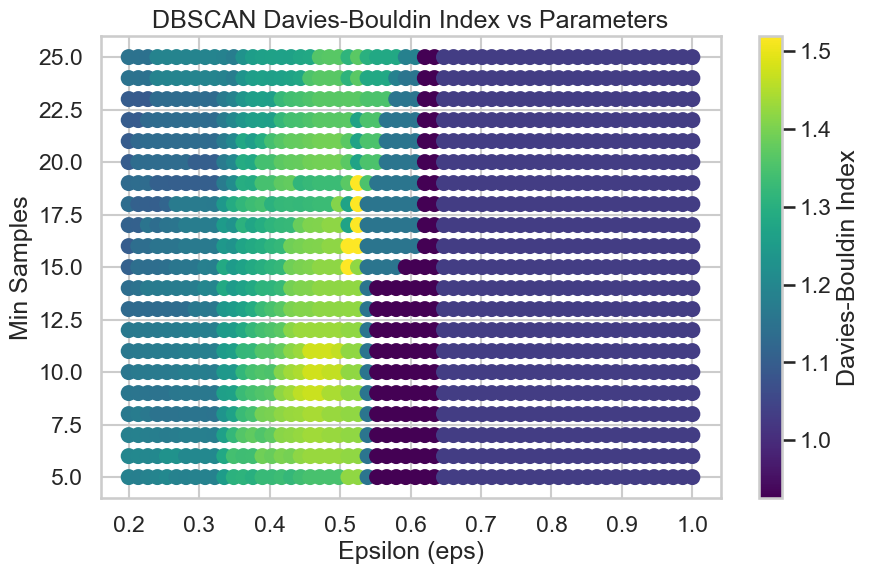

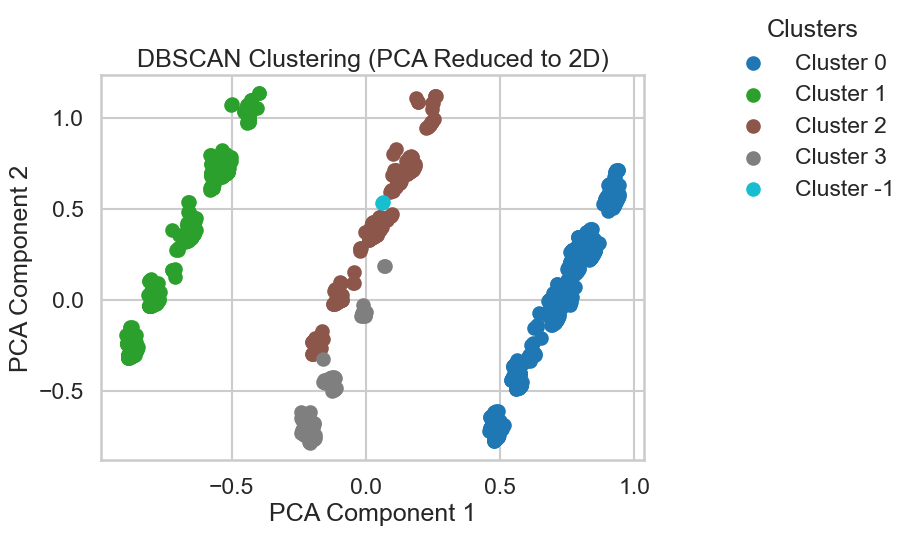

In [111]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define parameter search space
eps_values = np.linspace(0.2, 1, 60)
min_samples_values = range(5, 26)  # From 5 to 25

best_score = float('inf')  # Lower DBI is better
best_params = {}

dbi_scores = {}

# Iterate over different values of EPS and Min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(scaled_df)

        # Ignore noise points (-1 label)
        unique_clusters = set(labels)
        if -1 in unique_clusters:
            unique_clusters.remove(-1)
        num_clusters = len(unique_clusters)

        # Ensure valid clustering (at least 2 clusters)
        if num_clusters < 2:
            continue  

        # Compute Davies-Bouldin Index
        score = davies_bouldin_score(scaled_df, labels)
        dbi_scores[(eps, min_samples)] = score

        # Store best model parameters (lower DBI is better)
        if score < best_score:
            best_score = score
            best_params = {"eps": eps, "min_samples": min_samples, "num_clusters": num_clusters}

# Print best model parameters
print(f"Best DBSCAN Model: {best_params}")
print(f"Best Davies-Bouldin Index: {best_score:.4f}")

# --- Plot DBI Score vs EPS and Min_samples ---
plt.figure(figsize=(10, 6))

x_vals = [k[0] for k in dbi_scores.keys()]  # Epsilon values
y_vals = [k[1] for k in dbi_scores.keys()]  # Min_samples values
z_vals = list(dbi_scores.values())  # DBI scores

# 2D scatter plot with color representing DBI score
scatter = plt.scatter(x_vals, y_vals, c=z_vals, cmap='viridis', s=100)
plt.colorbar(scatter, label="Davies-Bouldin Index")  # Add color legend
plt.xlabel("Epsilon (eps)")
plt.ylabel("Min Samples")
plt.title("DBSCAN Davies-Bouldin Index vs Parameters")
plt.show()

# --- Plot Clusters ---
# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)

# Train DBSCAN with best parameters
best_dbscan = DBSCAN(eps=best_params["eps"], min_samples=best_params["min_samples"])
labels = best_dbscan.fit_predict(scaled_df)

# --- Plot Clusters in 2D (After PCA) ---
# --- Plot Clusters in 2D (After PCA) ---
plt.figure(figsize=(7, 5))
unique_labels = set(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))  # Assign colors

for label, color in zip(unique_labels, colors):
    mask = labels == label
    plt.scatter(reduced_data[mask, 0], reduced_data[mask, 1], color=color, label=f'Cluster {label}')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering (PCA Reduced to 2D)")

# Adjust legend position to avoid overlap
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.2), title="Clusters", frameon=False)

# Show plot with adjusted legend
plt.show()

In [123]:
from sklearn.metrics import silhouette_score
valid_mask = labels != -1
valid_data = scaled_df[valid_mask]  # Data points that are not noise
valid_labels = labels[valid_mask]   # Corresponding cluster labels

#Ensure we have at least 2 clusters
if len(set(valid_labels)) > 1:
    silhouette_avg = silhouette_score(valid_data, valid_labels)
    print(f"Silhouette Score for Best DBSCAN Clusters: {silhouette_avg:.4f}")
else:
    print("Silhouette Score cannot be computed (only one valid cluster found).")


Silhouette Score for Best DBSCAN Clusters: 0.4037
